## 7 Elevan Next- Machine Learning Challenge 
    1/12/2022
    By :- Arun Kumar 

In [813]:
# Required Liberay
import numpy as np
import pandas as pd
import requests
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [814]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [815]:

pokemons = []
# Get the data from PokeAPI
resp = requests.get('https://pokeapi.co/api/v2/pokemon?limit=1118').json()
for p in resp['results']:
    pokemons.append(p['name'])

len(pokemons)

1118

In [816]:
generate_data = False

In [817]:
if generate_data:
    pokemon_data = []
    completed = []
    not_completed = []

    for p in tqdm(sorted(pokemons)):
        p = p.lower().strip(" ")
        try:
            query = f'https://pokeapi.co/api/v2/pokemon/{p}'
            resp = requests.get(query).json()
            pokemon_data.append(ProcessData(resp).process())
            completed.append(p)
        except:
            not_completed.append(p)
    
    print(len(completed), len(not_completed))
    
    df = pd.concat(pokemon_data, axis=1).T
    df.set_index('name', inplace=True)
    df.to_parquet('../data/pokemon_data.parquet')
else:
    df = pd.read_parquet('../data/pokemon_data.parquet')

In [818]:
df.head()

,base_experience,order,height,weight,hp,hp_effort,attack,attack_effort,defense,defense_effort,special-attack,special-attack_effort,special-defense,special-defense_effort,speed,speed_effort,ability_1,ability_2,type_1,type_2
name,,,,,,,,,,,,,,,,,,,,
abomasnow,173,567,22,1355,90,0,92,1,75,0,92,1,85,0,60,0,snow-warning,soundproof,grass,ice
abomasnow-mega,208,568,27,1850,90,0,132,1,105,0,132,1,105,0,30,0,snow-warning,,grass,ice
abra,62,100,9,195,25,0,20,0,15,0,105,1,55,0,90,0,synchronize,inner-focus,psychic,
absol,163,460,12,470,65,0,130,2,60,0,75,0,60,0,75,0,pressure,super-luck,dark,
absol-mega,198,461,12,490,65,0,150,2,60,0,115,0,60,0,115,0,magic-bounce,,dark,


In [819]:
# Checking the dataset dimension
print("Total number of rows in the given dataset:-",df.shape[0])
print("Total number of rows in the given dataset:-",df.shape[1])

Total number of rows in the given dataset:- 1118
Total number of rows in the given dataset:- 20


In [820]:
# Checking the columns description
df.columns

Index(['base_experience', 'order', 'height', 'weight', 'hp', 'hp_effort',
       'attack', 'attack_effort', 'defense', 'defense_effort',
       'special-attack', 'special-attack_effort', 'special-defense',
       'special-defense_effort', 'speed', 'speed_effort', 'ability_1',
       'ability_2', 'type_1', 'type_2'],
      dtype='object')

In [821]:
# Datatype check to get basic understanding of the data types for each attributes
df.dtypes

base_experience            int64
order                      int64
height                     int64
weight                     int64
hp                         int64
hp_effort                  int64
attack                     int64
attack_effort              int64
defense                    int64
defense_effort             int64
special-attack             int64
special-attack_effort      int64
special-defense            int64
special-defense_effort     int64
speed                      int64
speed_effort               int64
ability_1                 object
ability_2                 object
type_1                    object
type_2                    object
dtype: object

In [822]:
# Data Statiscal Information
df.describe()

,base_experience,order,height,weight,hp,hp_effort,attack,attack_effort,defense,defense_effort,special-attack,special-attack_effort,special-defense,special-defense_effort,speed,speed_effort
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,157.024150,421.443649,21.427549,993.305009,70.025939,0.220036,80.678891,0.513417,74.756708,0.270125,73.231664,0.375671,72.572451,0.220930,69.479428,0.340787
std,78.842887,304.228098,58.158211,2067.911505,26.646333,0.651334,32.056040,0.905221,30.954899,0.657184,32.454237,0.840034,27.782111,0.625073,30.036549,0.739692
min,36.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,5.000000,0.000000,10.000000,0.000000,20.000000,0.000000,5.000000,0.000000
25%,70.000000,139.250000,5.000000,88.000000,50.000000,0.000000,55.000000,0.000000,50.250000,0.000000,50.000000,0.000000,50.000000,0.000000,45.000000,0.000000
50%,162.000000,410.500000,10.000000,302.500000,68.000000,0.000000,78.500000,0.000000,70.000000,0.000000,65.000000,0.000000,70.000000,0.000000,67.000000,0.000000
75%,207.000000,685.750000,16.000000,800.000000,80.750000,0.000000,100.000000,1.000000,90.000000,0.000000,95.000000,0.000000,90.000000,0.000000,90.000000,0.000000
max,608.000000,964.000000,1000.000000,10000.000000,255.000000,3.000000,190.000000,3.000000,250.000000,3.000000,194.000000,3.000000,250.000000,3.000000,200.000000,3.000000


In [823]:
print('\n Values count for different classes and missing info  :-', df['type_1'].value_counts(dropna=False))
print('Values count for different classes and missing info  :-', df['type_2'].value_counts(dropna=False))
print('Values count for different classes and missing info  :-', df['ability_1'].value_counts(dropna=False))
print('Values count for different classes and missing info :-', df['ability_2'].value_counts(dropna=False))


 Values count for different classes and missing info  :- water       141
normal      118
grass        96
bug          85
psychic      80
electric     77
rock         73
fire         69
dark         48
ghost        46
fighting     45
dragon       43
poison       43
ground       42
steel        40
ice          39
fairy        24
flying        9
Name: type_1, dtype: int64
Values count for different classes and missing info  :-             521
flying      126
fairy        48
psychic      43
poison       42
ground       40
steel        37
dragon       35
fighting     33
dark         28
grass        28
ghost        27
water        21
fire         19
ice          19
rock         16
electric     12
normal       12
bug          11
Name: type_2, dtype: int64
Values count for different classes and missing info  :- levitate        42
swift-swim      30
keen-eye        28
pressure        27
static          26
                ..
surge-surfer     1
air-lock         1
delta-stream     1
dragons-maw  

**POKEMAN DATASET**

There are 1118 rows and 20 columns. Each row represent one Pokeman.  
 
Based on the quick data analysis ['type_2'] and ['ability_2'] found that not avilable for all the Pokeman. 

Apply the label encoder on ability_1 and ability_2 to convert the catefogical data into numeric data

In [824]:

# Convert categorical classes data into numeric data
from sklearn.preprocessing import LabelEncoder

le_ability_1 = LabelEncoder()
le_ability_2 = LabelEncoder()

df['ability_1_le'] = le_ability_1.fit_transform(df['ability_1'])
df['ability_2_le'] = le_ability_2.fit_transform(df['ability_2'])

In [825]:
df.head()

,base_experience,order,height,weight,hp,hp_effort,attack,attack_effort,defense,defense_effort,...,special-defense,special-defense_effort,speed,speed_effort,ability_1,ability_2,type_1,type_2,ability_1_le,ability_2_le
name,,,,,,,,,,,,,,,,,,,,,
abomasnow,173,567,22,1355,90,0,92,1,75,0,...,85,0,60,0,snow-warning,soundproof,grass,ice,164,125
abomasnow-mega,208,568,27,1850,90,0,132,1,105,0,...,105,0,30,0,snow-warning,,grass,ice,164,0
abra,62,100,9,195,25,0,20,0,15,0,...,55,0,90,0,synchronize,inner-focus,psychic,,185,50
absol,163,460,12,470,65,0,130,2,60,0,...,60,0,75,0,pressure,super-luck,dark,,126,137
absol-mega,198,461,12,490,65,0,150,2,60,0,...,60,0,115,0,magic-bounce,,dark,,96,0


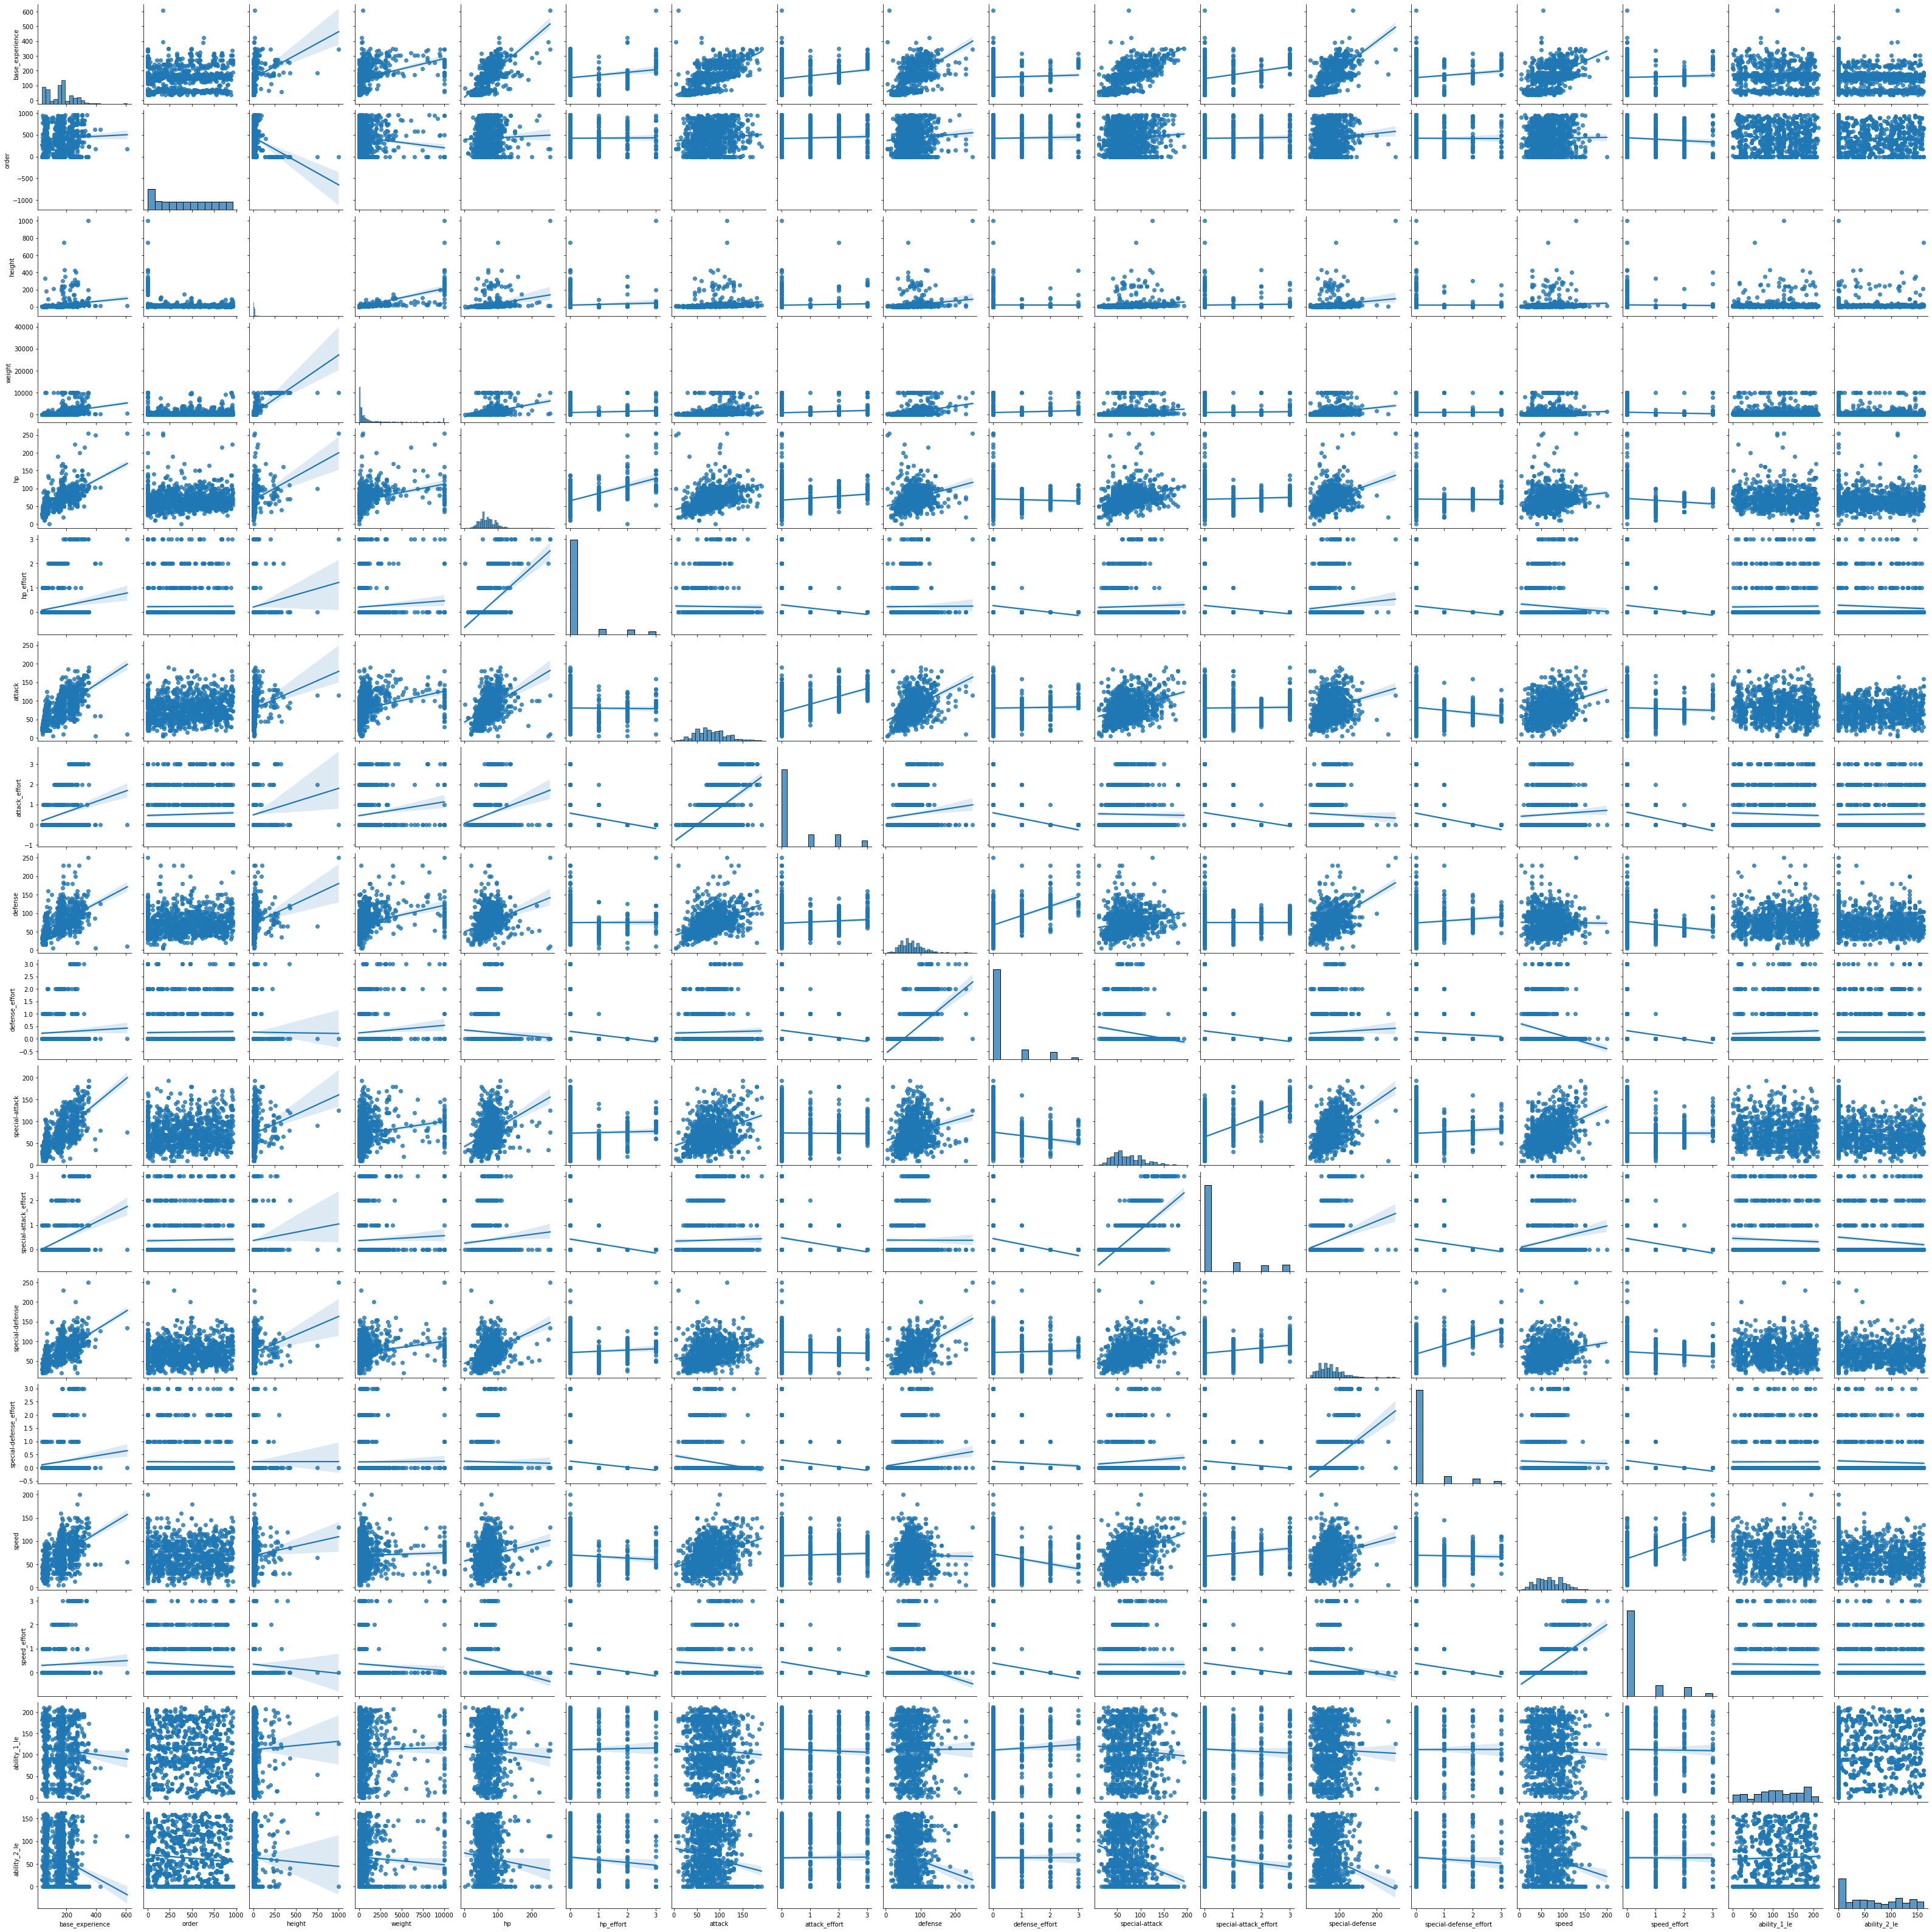

In [853]:
sns.pairplot(df, kind="reg")
plt.show()

### Checking Multicollinearity in the given dataset

<AxesSubplot:>

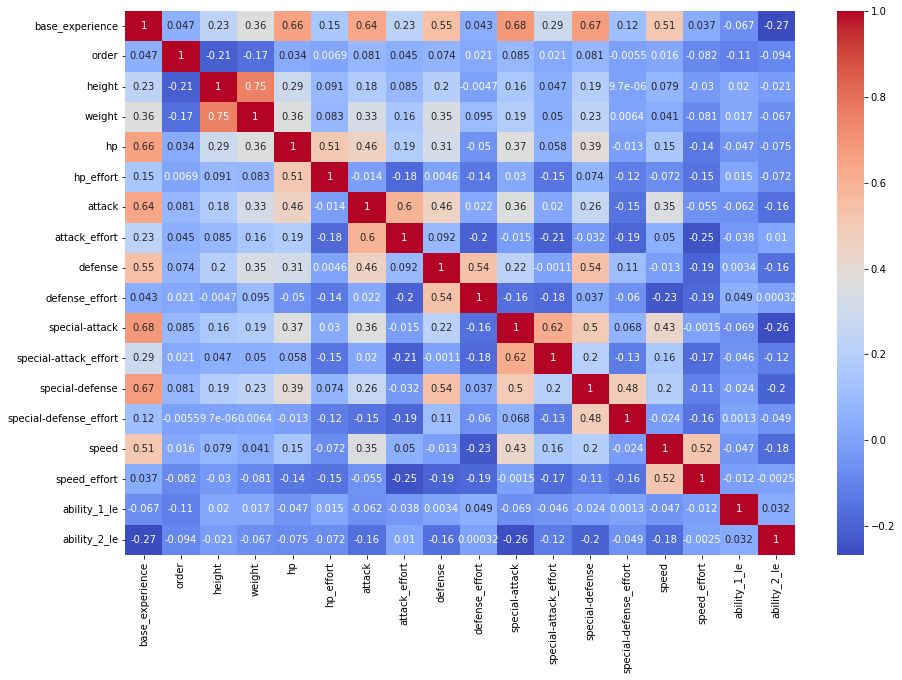

In [856]:
# Check the Multicollinearity 
import matplotlib.pyplot as plt
plt.figure (figsize=(15,10))
import seaborn as sns
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [854]:
# Variance Inflation Factor (VIF) implementation using Python

from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [855]:
calculate_vif(df=df, features=['base_experience', 'order', 'height', 'weight', 'hp', 'hp_effort',
       'attack', 'attack_effort', 'defense', 'defense_effort',
       'special-attack', 'special-attack_effort', 'special-defense',
       'special-defense_effort', 'speed', 'speed_effort'])

,VIF,Tolerance
base_experience,14.959566,0.066847
order,1.108516,0.902107
height,2.546671,0.392670
weight,2.809334,0.355956
hp,3.056107,0.327214
hp_effort,6.077633,0.164538
attack,3.400635,0.294063
attack_effort,10.244402,0.097614
defense,3.420586,0.292348
defense_effort,6.260333,0.159736


Above, we run the Variance Inflation Factor (VIF), we can see that Base_expeience,attack_effort, and special-attack feature/attributes has VIF more than 5. We can drop these column in the Model building

In [826]:
# Data Split into training and test data
for i in ['ability_1', 'ability_2']:
    df[i] = df[i].astype('category')
    
X = df[[i for i in df.columns if i not in ['type_1', 'type_2', 'ability_1', 'ability_2']]]
y = df['type_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# 75% training data and 25% test data 

In [827]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((838, 18), (280, 18), (838,), (280,))

In [828]:
X_train.head()

,base_experience,order,height,weight,hp,hp_effort,attack,attack_effort,defense,defense_effort,special-attack,special-attack_effort,special-defense,special-defense_effort,speed,speed_effort,ability_1_le,ability_2_le
name,,,,,,,,,,,,,,,,,,
goldeen,64,179,6,150,45,0,67,1,60,0,35,0,50,0,63,0,184,159
vivillon,185,775,12,170,80,1,52,0,50,0,90,1,50,0,89,1,158,15
lunala,306,945,40,1200,137,0,113,0,89,0,137,3,107,0,97,0,153,0
slowbro,172,121,16,785,95,0,75,0,110,2,100,0,80,0,30,0,113,82
melmetal,270,-1,25,8000,135,0,143,3,143,0,80,0,65,0,34,0,87,0


In [829]:
X_test.head()

,base_experience,order,height,weight,hp,hp_effort,attack,attack_effort,defense,defense_effort,special-attack,special-attack_effort,special-defense,special-defense_effort,speed,speed_effort,ability_1_le,ability_2_le
name,,,,,,,,,,,,,,,,,,
toucannon,218,855,11,260,80,0,120,3,75,0,75,0,75,0,60,0,89,118
bulbasaur,64,1,7,69,45,0,49,0,49,0,65,1,65,0,45,0,115,12
kricketune,134,515,10,255,77,0,85,2,51,0,55,0,51,0,65,0,182,144
phione,216,585,4,31,80,1,80,0,80,0,80,0,80,0,80,0,74,0
ralts,40,362,4,66,28,0,25,0,25,0,45,1,35,0,40,0,185,151


### Applied Supervised ML Algorithms :- 
    * Logistic Regression
    * Random Forest**

### Classification Model Evaluation Metrix

In [831]:
# Model Performance metrics 
def ModelPerformance_metrics(model, title, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    print(title)
    
    print('==============')
    print("Training Dataset Metrics")
    print('==============')
    y_train_pred = model.predict(X_train)
    pred_accuracy_score = accuracy_score(y_train, y_train_pred)
    pred_recall_score = recall_score(y_train, y_train_pred, average='macro')
    print('accuracy', pred_accuracy_score,'\n', 'recall', pred_recall_score)
    
    print('==============')
    print("Testing Dataset Metrics")
    print('==============')
    
    y_test_pred = model.predict(X_test)
    pred_accuracy_score = accuracy_score(y_test, y_test_pred)
    pred_recall_score = recall_score(y_test, y_test_pred, average='macro')
    print('accuracy', pred_accuracy_score,'\n', 'recall', round(pred_recall_score,2),'%')

**Logistic Regression**

In [832]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
LogiMod= LogisticRegression(random_state=42, max_iter=10000)
LogiMod.fit(X_train, y_train)  

# prediction
y_pred=RanForMod.predict(X_test)


# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(LogiMod.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


C:\Users\H177625\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [833]:
ModelPerformance_metrics(LogiMod, title='Random Forest Model Evalution Metrix')

Random Forest Model Evalution Metrix
Training Dataset Metrics
accuracy 0.30071599045346065 
 recall 0.23760282672240876
Testing Dataset Metrics
accuracy 0.26071428571428573 
 recall 0.19 %


**Random Forest Algorithm**

In [834]:
# Initize a Random Forest Classifier
RanForMod=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RanForMod.fit(X_train,y_train)

# prediction
y_pred=RanForMod.predict(X_test)


# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RanForMod.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [835]:
ModelPerformance_metrics(RanForMod, title='Random Forest Model Evalution Metrix')

Random Forest Model Evalution Metrix
Training Dataset Metrics
accuracy 0.9976133651551312 
 recall 0.9968253968253968
Testing Dataset Metrics
accuracy 0.45357142857142857 
 recall 0.36 %


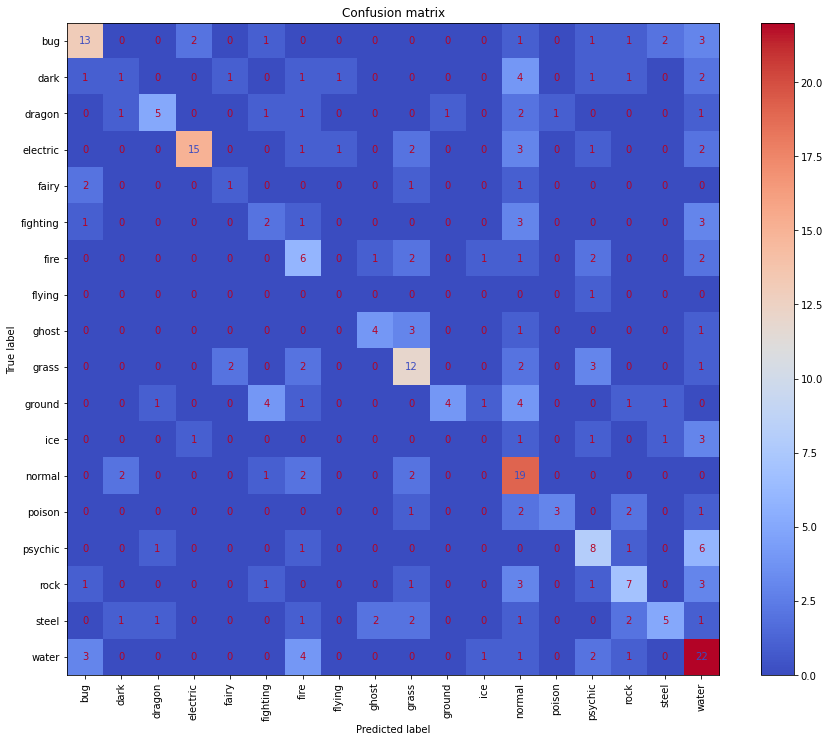

In [836]:
# Plot non-normalized confusion matrix
fig, ax = plt.subplots(figsize=(15, 12))

disp = plot_confusion_matrix(
    RanForMod,
    X_test,
    y_test,
    cmap=plt.cm.coolwarm,
    ax=ax
)
_ = disp.ax_.set_title("Confusion matrix")
_ = plt.xticks(rotation = 90)


In [837]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

         bug       0.62      0.54      0.58        24
        dark       0.20      0.08      0.11        13
      dragon       0.62      0.38      0.48        13
    electric       0.83      0.60      0.70        25
       fairy       0.25      0.20      0.22         5
    fighting       0.20      0.20      0.20        10
        fire       0.29      0.40      0.33        15
      flying       0.00      0.00      0.00         1
       ghost       0.57      0.44      0.50         9
       grass       0.46      0.55      0.50        22
      ground       0.80      0.24      0.36        17
         ice       0.00      0.00      0.00         7
      normal       0.39      0.73      0.51        26
      poison       0.75      0.33      0.46         9
     psychic       0.38      0.47      0.42        17
        rock       0.44      0.41      0.42        17
       steel       0.56      0.31      0.40        16
 

### Random Forest Algorithm  Hyperparameter Optimization

In [838]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [839]:
import optuna

In [840]:
def ParameterOptimization(trial):
      n_estimators = trial.suggest_int('n_estimators', 20, 200)
      max_depth = trial.suggest_int('max_depth', 3, 10)
      max_features = trial.suggest_uniform('max_features', 0.15, 1.0)
      min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
      min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 7)
      max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
      class_weight = trial.suggest_categorical("class_weight", ["balanced", "balanced_subsample", None])

      RanForMod = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            max_features=max_features, 
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_samples=max_samples,
            bootstrap=True, 
            n_jobs=-1, 
            verbose=0,
            class_weight=class_weight
            )
      return cross_val_score(RanForMod, X, y, n_jobs=-1, cv=3).mean()

In [841]:
BestParameterStudy = optuna.create_study(direction='maximize')
BestParameterStudy.optimize(ParameterOptimization, n_trials=100)

[I 2022-01-12 19:38:29,541] A new study created in memory with name: no-name-6a055b52-4a9b-414b-a995-d68943b74634
[I 2022-01-12 19:38:38,640] Trial 0 finished with value: 0.28529697214294636 and parameters: {'n_estimators': 72, 'max_depth': 5, 'max_features': 0.8244925063373447, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_samples': 0.9741414371327455, 'class_weight': None}. Best is trial 0 with value: 0.28529697214294636.
[I 2022-01-12 19:38:45,268] Trial 1 finished with value: 0.24685539123833686 and parameters: {'n_estimators': 133, 'max_depth': 4, 'max_features': 0.18781372343671904, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': 0.6494150002556393, 'class_weight': None}. Best is trial 0 with value: 0.28529697214294636.
[I 2022-01-12 19:38:51,685] Trial 2 finished with value: 0.3076551644613566 and parameters: {'n_estimators': 195, 'max_depth': 7, 'max_features': 0.8559696602811616, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_samples': 0.844077930771

[I 2022-01-12 19:39:07,161] Trial 25 finished with value: 0.32196085214333076 and parameters: {'n_estimators': 189, 'max_depth': 10, 'max_features': 0.6704537933942082, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_samples': 0.8758164068279045, 'class_weight': None}. Best is trial 24 with value: 0.33804664302804927.
[I 2022-01-12 19:39:07,464] Trial 26 finished with value: 0.3228376911028472 and parameters: {'n_estimators': 100, 'max_depth': 10, 'max_features': 0.46982457982640324, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_samples': 0.9518520535573034, 'class_weight': None}. Best is trial 24 with value: 0.33804664302804927.
[I 2022-01-12 19:39:08,000] Trial 27 finished with value: 0.32553547233993485 and parameters: {'n_estimators': 185, 'max_depth': 9, 'max_features': 0.7763368942456859, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_samples': 0.8794502235853493, 'class_weight': None}. Best is trial 24 with value: 0.33804664302804927.
[I 2022-01-12 19:39:08,369]

[I 2022-01-12 19:39:15,793] Trial 50 finished with value: 0.3139179567009715 and parameters: {'n_estimators': 76, 'max_depth': 8, 'max_features': 0.9488847244629246, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_samples': 0.7834062578921063, 'class_weight': None}. Best is trial 41 with value: 0.35147789404902613.
[I 2022-01-12 19:39:16,047] Trial 51 finished with value: 0.3121282443041502 and parameters: {'n_estimators': 65, 'max_depth': 9, 'max_features': 0.993116010469323, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_samples': 0.8524675554169299, 'class_weight': None}. Best is trial 41 with value: 0.35147789404902613.
[I 2022-01-12 19:39:16,347] Trial 52 finished with value: 0.34610154996300463 and parameters: {'n_estimators': 85, 'max_depth': 9, 'max_features': 0.8881758120217151, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_samples': 0.8683828139939055, 'class_weight': None}. Best is trial 41 with value: 0.35147789404902613.
[I 2022-01-12 19:39:16,701] Trial 53 

[I 2022-01-12 19:39:23,399] Trial 75 finished with value: 0.3353776893731923 and parameters: {'n_estimators': 136, 'max_depth': 10, 'max_features': 0.9696546829909941, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_samples': 0.6516943495814459, 'class_weight': None}. Best is trial 41 with value: 0.35147789404902613.
[I 2022-01-12 19:39:23,785] Trial 76 finished with value: 0.33804424072953004 and parameters: {'n_estimators': 131, 'max_depth': 10, 'max_features': 0.8876346564417266, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_samples': 0.7001897076819856, 'class_weight': None}. Best is trial 41 with value: 0.35147789404902613.
[I 2022-01-12 19:39:24,143] Trial 77 finished with value: 0.3380610568191646 and parameters: {'n_estimators': 124, 'max_depth': 10, 'max_features': 0.91541156346408, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_samples': 0.6723055119977888, 'class_weight': None}. Best is trial 41 with value: 0.35147789404902613.
[I 2022-01-12 19:39:24,360] Tria

In [842]:
trial = BestParameterStudy.best_trial
trial.params

{'n_estimators': 104,
 'max_depth': 9,
 'max_features': 0.8942992268893282,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_samples': 0.9315792410019063,
 'class_weight': None}

### Ramdom Forest- Final Model After Hyperparameter tuning

In [843]:
# Initize a Random Forest Classifier with best parameters
RanForMod_Final=RandomForestClassifier(**trial.params)

#Train the model using the training sets y_pred=clf.predict(X_test)
RanForMod_Final.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features=0.8942992268893282,
                       max_samples=0.9315792410019063, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=104)

In [844]:
ModelPerformance_metrics(RanForMod_Final, title='Random Forest Final Model Evaluation Metrix')

Random Forest Final Model Evaluation Metrix
Training Dataset Metrics
accuracy 0.752983293556086 
 recall 0.6691709095370811
Testing Dataset Metrics
accuracy 0.43214285714285716 
 recall 0.35 %


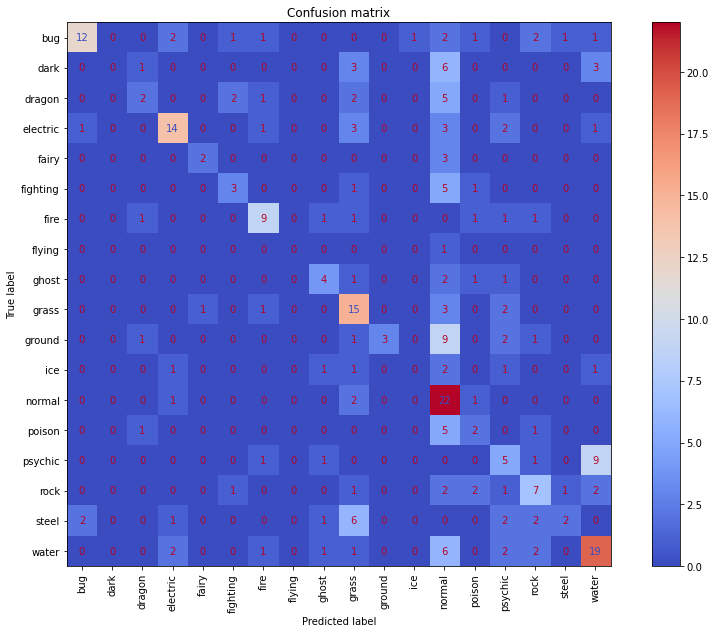

In [845]:
# Plot non-normalized confusion matrix
fig, ax = plt.subplots(figsize=(15, 10))
disp = plot_confusion_matrix(
    RanForMod_Final,
    X_test,
    y_test,
    cmap=plt.cm.coolwarm,
    ax=ax
)
_ = disp.ax_.set_title("Confusion matrix")
_ = plt.xticks(rotation = 90)


In [846]:
import joblib
joblib.dump(RanForMod_Final,"C:/PythonData/model/RanForMod_Final.joblib")

['C:/PythonData/model/RanForMod_Final.joblib']

In [847]:
# Load the model from the file
loaded_RanForMod_Final=joblib.load("C:/PythonData/model/RanForMod_Final.joblib")

In [848]:
RanForMod_Final.classes_

array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'], dtype=object)

In [849]:
with open('C:/PythonData/model/RanForMod_Final.joblib', 'w') as f:
    for item in RanForMod_Final.classes_:
        f.write("%s\n" % item)

In [850]:
from joblib import dump, load
dump(le_ability_1, 'C:/PythonData/model/le_ability_1.bin')
dump(le_ability_2, 'C:/PythonData/model/le_ability_2.bin')

['C:/PythonData/model/le_ability_2.bin']

In [851]:
with open('C:/PythonData/model/RanForMod_Final.joblib', 'r') as f:
    classes = f.readlines()
    classes = [c.strip('\n') for c in classes]

In [852]:
classes[RanForMod_Final.predict(X.iloc[0:10]).argmax()]

'dragon'